<a href="https://colab.research.google.com/github/PrasanthGubbala/MS-in-Information-Science-Machine-Learning/blob/dev/Course2/Assignment5/UoA_assesment_w5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 5: K Means and K Medoids Clustering

### Objective:
To build Unsupervised models like K-Means, K-Medoids(PAM) clustering to discover hidden and interesting patterns inside the data. Comparing the results of all, Visualizing and interpreting the formed clusters.

### Fatal Police Shooting Data

**About dataset**\
The dataset consists of following columns
1. **id**                         : unqiue identifier of each victim
2. **name**                       : name of a victim
3. **date**                       : date on fatal shooting
4. **manner_of_death**            : manner of death classification
    * Shot
    * Shot and Tasered
5. **armed**                      : indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
    * undetermined: it is not known whether or not the victim had a weapon
    * unknown: the victim was armed, but it is not known what the object was
    * unarmed: the victim was not armed
6. **age**                        : age of victim
7. **gender**                     : the gender of the victim. The Post identifies victims by the gender they identify with if reports indicate that it differs from their biological sex.
    * M: Male
    * F: Female
    * None: Unknown
8. **race**                       : race of victim
    * W: White, non-Hispanic
    * B: Black, non-Hispanic
    * A: Asian
    * N: Native American
    * H: Hispanic
    * O: Other
    * None: unknown
9. **city**                       : the municipality where the fatal shooting took place. Note that in some cases this field may contain a county name if a more specific municipality is unavailable or unknown.
10. **state**                     : two-letter postal code abbreviation
11. **signs_of_mental_illness**   : News reports have indicated the victim had a history of mental health issues, expressed suicidal intentions or was experiencing mental distress at the time of the shooting.
12. **threat_level**              : These would include incidents where officers or others were shot at, threatened with a gun, attacked with other weapons or physical force, etc. The attack category is meant to flag the highest level of threat. The other and undetermined categories represent all remaining cases. Other includes many incidents where officers or others faced significant threats.
13. **flee**                      : News reports have indicated the victim was moving away from officers
    * Foot
    * Car
    * Not fleeing
14. **body_camera**               : News reports have indicated an officer was wearing a body camera and it may have recorded some portion of the incident.

### Import all neccessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import copy

import warnings
warnings.filterwarnings('ignore')

In [ ]:
police = pd.read_csv("fatal-police-shootings-data.csv")
police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4478 entries, 0 to 4477
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4478 non-null   int64  
 1   name                     4478 non-null   object 
 2   date                     4478 non-null   object 
 3   manner_of_death          4478 non-null   object 
 4   armed                    4230 non-null   object 
 5   age                      4309 non-null   float64
 6   gender                   4473 non-null   object 
 7   race                     4105 non-null   object 
 8   city                     4478 non-null   object 
 9   state                    4478 non-null   object 
 10  signs_of_mental_illness  4478 non-null   bool   
 11  threat_level             4478 non-null   object 
 12  flee                     4299 non-null   object 
 13  body_camera              4478 non-null   bool   
dtypes: bool(2), float64(1), 

### Let's pre-process the data

In [ ]:
# Remove all the rows that contain missing value
police = police.dropna()

In [ ]:
police.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
# Drop redundant or not so useful columns for model building
police = police.drop(['id','date','name','city','state'],axis=1)


# We take a copy of our source data.
df = copy.deepcopy(police)
df.head()




,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera
0,shot,gun,53.0,M,A,True,attack,Not fleeing,False
1,shot,gun,47.0,M,W,False,attack,Not fleeing,False
2,shot and Tasered,unarmed,23.0,M,H,False,other,Not fleeing,False
3,shot,toy weapon,32.0,M,W,True,attack,Not fleeing,False
4,shot,nail gun,39.0,M,H,False,attack,Not fleeing,False


In [ ]:
# Convert categorical variables to numeric
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer

In [ ]:
df.head()

,manner_of_death,armed,age,gender,race,signs_of_mental_illness,threat_level,flee,body_camera
0,0,30,53.0,1,0,True,0,2,False
1,0,30,47.0,1,5,False,0,2,False
2,1,75,23.0,1,2,False,1,2,False
3,0,74,32.0,1,5,True,0,2,False
4,0,53,39.0,1,2,False,0,2,False


In [ ]:
# Convert boolean features to numeric
df = pd.get_dummies(df, columns=['signs_of_mental_illness','body_camera'])

In [ ]:
df.head()

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True
0,0,30,53.0,1,0,0,2,0,1,1,0
1,0,30,47.0,1,5,0,2,1,0,1,0
2,1,75,23.0,1,2,1,2,1,0,1,0
3,0,74,32.0,1,5,0,2,0,1,1,0
4,0,53,39.0,1,2,0,2,1,0,1,0


### Let's perform K-Means Clustering on the data

### Question 1: 2 Marks
**Perform K-Means clustering on 1 to 10 clusters using the pre processed data and find each cluster's inertia rate. Also, find the optimal number of clusters.**

cluster 1 inertia_:  1805884.070434071
cluster 2 inertia_:  741383.706605721
cluster 3 inertia_:  397045.320886161
cluster 4 inertia_:  325483.7542189378
cluster 5 inertia_:  260595.29455126706
cluster 6 inertia_:  220953.6298437366
cluster 7 inertia_:  184431.49416116875
cluster 8 inertia_:  152709.40070101505
cluster 9 inertia_:  133243.11337097452
cluster 10 inertia_:  114874.6453774159


Text(0, 0.5, 'Inertia')

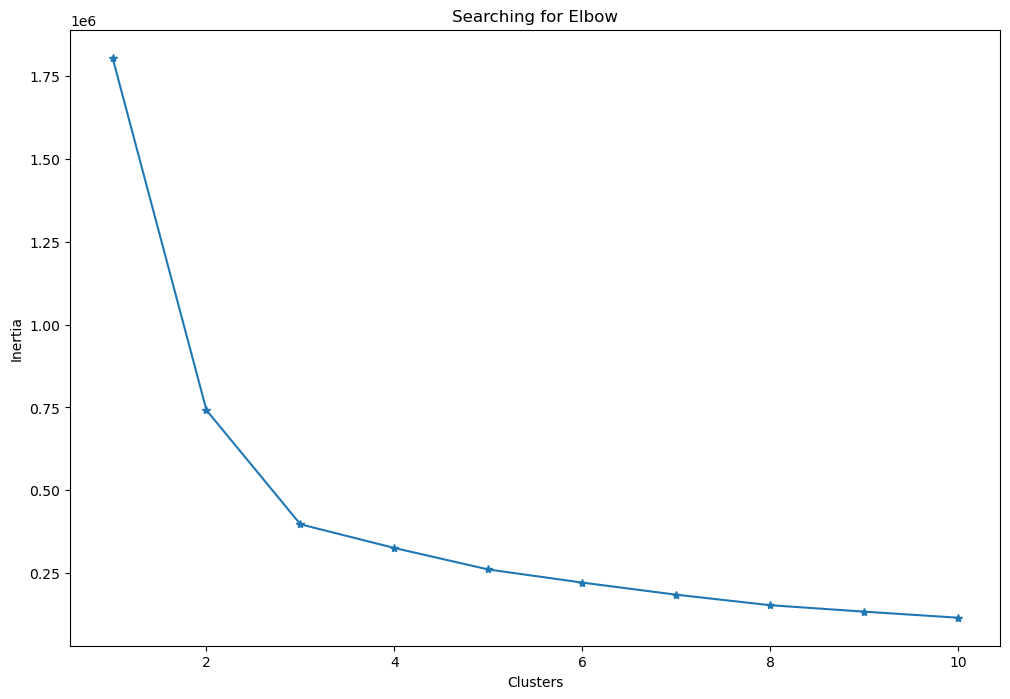

In [ ]:
# from sklearn.cluster import '<<__A__>>'      # import corresponding library to perform  kmeans

# clusters = []

# for '<<__B__>>':       # write a for loop to loop through 1 to 10 clusters.
#     km = '<<__C__>>'(n_clusters=i,random_state = 1).'<<__D__>>'   #Fit the pre-processed data to the KMeans clusters from sklearn.cluster library.Save it in the new variable km
#     clusters.'<<__E__>>'(km.inertia_)                     # Append created empty list 'clusters' to capture inertia of all clusters
#     print(km.inertia_)


# ## Plotting Elbow plot to know the optimal number of clusters.
# fig, ax = plt.subplots(figsize=(12, 8))
# plt.plot(range(1,11),clusters, marker = '*')
# ax.set_title('Searching for Elbow')
# ax.set_xlabel('Clusters')
# ax.set_ylabel('Inertia')

from sklearn.cluster import KMeans      # import corresponding library to perform  kmeans

clusters = []

for i in range(1, 11):       # write a for loop to loop through 1 to 10 clusters.
    km = KMeans(n_clusters=i,random_state = 1).fit(df)   #Fit the pre-processed data to the KMeans clusters from sklearn.cluster library.Save it in the new variable km
    clusters.append(km.inertia_)                     # Append created empty list 'clusters' to capture inertia of all clusters
    print(f'cluster {i} inertia_: ', km.inertia_)


## Plotting Elbow plot to know the optimal number of clusters.
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(range(1,11),clusters, marker = '*')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


# TODO: Code to fill:

# 1. '<<__A__>>' --> import corresponding library to perform  kmeans
# 2. '<<__B__>>' --> write a for loop to loop through 1 to 10 clusters.
# 3. '<<__C__>>','<<__D__>> --> write appropriate command to fit the pre-processed data to the KMeans clusters from sklearn.cluster library.Save it in the new variable km
# 4. '<<__E__>>' --> Append created empty list 'clusters' to capture inertia of all clusters

In [ ]:
# print("Optimal number of cluster is __________.") # Find out the optimal number of cluster by seeing the Elbow plot and inertia.

optimal_cluster_count = clusters.index(min(clusters)) + 1
print(f"Optimal number of clusters is {optimal_cluster_count}.")


Optimal number of clusters is 10.


In [ ]:
'''method-2'''
# Finding the optimal number of clusters based on the Elbow plot
optimal_num_clusters = None
# Look for the "elbow" point in the plot (where inertia starts decreasing more slowly)
for i in range(1, len(clusters)):
    if clusters[i] - clusters[i - 1] < 0.1 * clusters[i - 1]:  # You can adjust the threshold as needed
        optimal_num_clusters = i
        break

if optimal_num_clusters is not None:
    print(f"Optimal number of clusters is {optimal_num_clusters}.")
else:
    print("Optimal number of clusters could not be determined.")


Optimal number of clusters is 1.


### Question 2: 2 Marks
**Perform KMeans Clustering on 3 clusters and assign the cluster labels to a new attribute 'clusters'.**

In [ ]:
# kmeans = '<<__A__>>'('<<__B__>>',random_state = 1) # Build K Means of 3 Clusters
# kmeans.fit(df)
# df_cluster = df.copy()
# df_cluster['clusters'] = '<<__C__>>'           # Assign Cluster labels on new attribute 'clusters'
# df_cluster.head()

kmeans = KMeans(n_clusters=3,random_state = 1) # Build K Means of 3 Clusters
kmeans.fit(df)
df_cluster = df.copy()
df_cluster['clusters'] = kmeans.labels_           # Assign Cluster labels on new attribute 'clusters'
df_cluster.head()



# TODO: Code to fill:

# 1. '<<__A__>>','<<__B__>>' --> use appropriate function and paramter to build 3 clusters
# 2.  '<<__C__>>'-->  Use appropriate command to assign Cluster labels on new attribute 'clusters'

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True,clusters
0,0,30,53.0,1,0,0,2,0,1,1,0,0
1,0,30,47.0,1,5,0,2,1,0,1,0,0
2,1,75,23.0,1,2,1,2,1,0,1,0,1
3,0,74,32.0,1,5,0,2,0,1,1,0,1
4,0,53,39.0,1,2,0,2,1,0,1,0,1


### Cluster Profiling

In [ ]:
cluster_profiles = df_cluster.groupby('clusters').mean()
cluster_profiles

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True
clusters,,,,,,,,,,,
0,0.049571,31.956149,51.851287,0.950429,3.914204,0.298379,1.777884,0.706387,0.293613,0.907531,0.092469
1,0.074896,74.611650,33.324549,0.938974,3.062413,0.675451,1.443828,0.771151,0.228849,0.857143,0.142857
2,0.046487,31.925515,29.268357,0.963022,2.984680,0.328579,1.589540,0.765452,0.234548,0.880613,0.119387


In [ ]:
cluster_profiles = df_cluster.groupby("clusters").mean()
cluster_profiles['Freq']= df_cluster.clusters.value_counts().sort_index()
cluster_profiles.T

clusters,0,1,2
manner_of_death,0.049571,0.074896,0.046487
armed,31.956149,74.611650,31.925515
age,51.851287,33.324549,29.268357
gender,0.950429,0.938974,0.963022
race,3.914204,3.062413,2.984680
threat_level,0.298379,0.675451,0.328579
flee,1.777884,1.443828,1.589540
signs_of_mental_illness_False,0.706387,0.771151,0.765452
signs_of_mental_illness_True,0.293613,0.228849,0.234548
body_camera_False,0.907531,0.857143,0.880613


In [ ]:
# let's display cluster profiles
cluster_profiles.style.highlight_max(color="lightgreen", axis=0)

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True,Freq
clusters,,,,,,,,,,,,
0,0.049571,31.956149,51.851287,0.950429,3.914204,0.298379,1.777884,0.706387,0.293613,0.907531,0.092469,1049
1,0.074896,74.611650,33.324549,0.938974,3.062413,0.675451,1.443828,0.771151,0.228849,0.857143,0.142857,721
2,0.046487,31.925515,29.268357,0.963022,2.984680,0.328579,1.589540,0.765452,0.234548,0.880613,0.119387,1893


### Question 3: 2 Marks
**Share you insights from the cluster profiles, 1 observation each.**

### Intepretations:
* Cluster 0  =
* Cluster 1 =
* Cluster 2 =

Cluster 0:

Cluster 0 represents an older demographic with a predominantly male composition. Incidents in this cluster are less likely to involve the use of body cameras. This cluster is the most frequent among the three.

Cluster 1:

Cluster 1 consists of individuals who are more likely to be armed during incidents. It has a younger age demographic, with a moderate representation of various races. Incidents in this cluster are often captured on body cameras.

Cluster 2:

Cluster 2 comprises a younger demographic, with individuals less likely to be armed during incidents. It shares a similar racial composition with Cluster 1 but has a higher frequency of incidents without body cameras. This cluster is the most frequent among the three clusters

# DETAILED POINTS

# Cluster 0:
- Cluster 0 has a relatively higher average age (approximately 51.85 years) compared to the other clusters.
- The majority of individuals in this cluster are male (gender = 0.950), indicating a male-dominated composition.
- Cluster 0 has a higher representation of people identified as 'White' (race = 3.914), suggesting a predominantly White demographic.
- There is a relatively low frequency of body camera usage (body_camera_True = 0.092), indicating that incidents in this cluster often did not involve the use of body cameras.
- It has a moderate rate of signs of mental illness (signs_of_mental_illness_True = 0.294).
- This cluster has the higher frequency among the three clusters, with 1049 data points.

# Cluster 1:
- Cluster 1 has the highest average value for the 'armed' feature (approximately 74.61), indicating that individuals in this cluster were more likely to be armed during incidents.
- The average age in Cluster 1 is relatively lower (approximately 33.32 years) compared to Cluster 0, indicating a younger demographic.
- It has a moderate representation of individuals identified as 'White' (race = 3.062) and is not heavily skewed towards any particular race.
- There is a higher frequency of incidents where body cameras were used (body_camera_True = 0.143), suggesting a greater likelihood of capturing events on body cameras.
- Cluster 1 has a moderate rate of signs of mental illness (signs_of_mental_illness_True = 0.229).
- It is the second most frequent cluster with 721 data points.

# Cluster 2:
- Cluster 2 has a relatively lower average value for the 'armed' feature (approximately 31.93), indicating that individuals in this cluster were less likely to be armed during incidents compared to Cluster 1.
- The average age in Cluster 2 is the lowest among the clusters (approximately 29.27 years), suggesting a younger demographic.
- It has a moderate representation of individuals identified as 'White' (race = 2.985), similar to Cluster 1.
- There is a relatively higher frequency of incidents where body cameras were not used (body_camera_False = 0.881), indicating a lower likelihood of capturing events on body cameras.
- Cluster 2 also has a moderate rate of signs of mental illness (signs_of_mental_illness_True = 0.235).
- This cluster is the most frequent among the three clusters, with 1893 data points.

These observations provide an initial understanding of the characteristics of each cluster based on the mean values of the features and their associated frequencies. Further analysis and domain knowledge may be required to draw more detailed and context-specific insights from these clusters.

## K-Medoids Clustering or PAM

- Medoids are representative objects of a data set or a cluster within a data set whose sum of dissimilarities to all the objects in the cluster is minimal. K-Medoids (also called Partitioning Around Medoid)

In [ ]:
# To install K Medoids we need sklearn-extra, hence install sklearn-extra library
!pip install scikit-learn-extra

     -------------------------------------- 343.0/343.0 kB 1.3 MB/s eta 0:00:00


### Question 4: 2 Marks
**Perform K Medoids or PAM on 1 to 10 clusters using the pre processed data and find each cluster's inertia rate.**

In [ ]:
# from sklearn_extra.cluster import '<<__A__>>'
# clusters = []

# for '<<__B__>>':
#    km = '<<__C__>>'(n_clusters=i,random_state = 1).'<<__D__>>'
#     clusters.'<<__E__>>'(km.inertia_)
#     print(km.inertia_)

from sklearn_extra.cluster import KMedoids
clusters = []

for i in range(1, 11):
    km = KMedoids(n_clusters=i,random_state = 1).fit(df)
    clusters.append(km.inertia_)
    print(f'cluster {i} inertia_: ',km.inertia_)


# TODO: Code to fill:

# 1. '<<__A__>>' --> import corresponding library to perform K medoids
# 2. '<<__B__>>' --> write a for loop to loop through 1 to 10 clusters.
# 3. '<<__C__>>','<<__D__>> --> write appropriate command to fit the pre-processed data to the kmedoids clusters from sklearn.cluster library.Save it in the new variable km
# 4. '<<__E__>>' --> Append created empty list 'clusters' to capture inertia of all clusters

cluster 1 inertia_:  68980.03620208926
cluster 2 inertia_:  56359.58814678746
cluster 3 inertia_:  32664.536696287338
cluster 4 inertia_:  28776.023806173373
cluster 5 inertia_:  26098.652894748942
cluster 6 inertia_:  25544.274661814285
cluster 7 inertia_:  23587.68001922701
cluster 8 inertia_:  23244.293832559782
cluster 9 inertia_:  21496.67015595424
cluster 10 inertia_:  20167.1582591867


In [ ]:
'''method-2 (square root inertia values)'''
clusters2 = []

for i in range(1, 11):
    km = KMedoids(n_clusters=i,random_state = 1).fit(df)
    clusters2.append(np.sqrt(km.inertia_))
    print(f'cluster {i} inertia_ ',np.sqrt(km.inertia_))




cluster 1 inertia_  262.64050754232346
cluster 2 inertia_  237.40174419491416
cluster 3 inertia_  180.73333034138264
cluster 4 inertia_  169.63497223795974
cluster 5 inertia_  161.55077497415152
cluster 6 inertia_  159.82576344824474
cluster 7 inertia_  153.5828116008657
cluster 8 inertia_  152.4607944114151
cluster 9 inertia_  146.61742787252217
cluster 10 inertia_  142.01112019552096


### Question 5: 2 Marks
**Check the Silhouette scores for clusters ranging from 2 to 10 and also visualize them. Find out the optimal number of clusters.**

For n_clusters = 2, the silhouette score is 0.30128748475434614)
For n_clusters = 3, the silhouette score is 0.5215778827107759)
For n_clusters = 4, the silhouette score is 0.4099825101260743)
For n_clusters = 5, the silhouette score is 0.43348558242811247)
For n_clusters = 6, the silhouette score is 0.38185773511329385)
For n_clusters = 7, the silhouette score is 0.427858941948385)
For n_clusters = 8, the silhouette score is 0.4127408630790201)
For n_clusters = 9, the silhouette score is 0.4130675437931936)
For n_clusters = 10, the silhouette score is 0.40325410196089356)


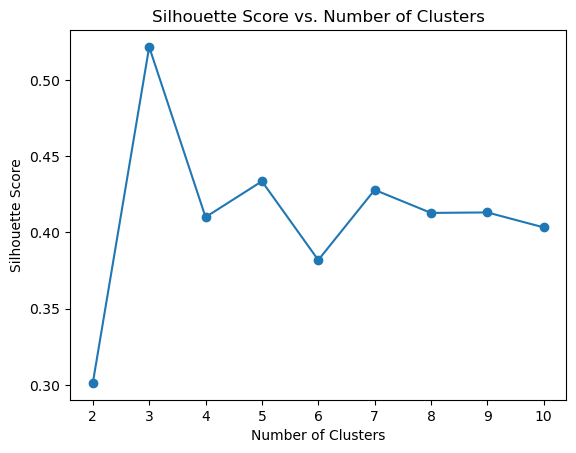

In [ ]:
# sil_score = []
# cluster_list = '<<__A__>>'
# for n_clusters in cluster_list:
#     clusterer = '<<__B__>>'(n_clusters=n_clusters)
#     preds = '<<__C__>>'.'<<__D__>>'
#     score = '<<__E__>>'(df, preds)
#     sil_score.append(score)        # Appending silhourtte scores of 2 to 10 clusters into earlier created empty list sil_score.
#     print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

# plt.plot('<<__F__>>', '<<__G__>>')
# plt.show()

sil_score = []
cluster_list = list(range(2, 11))
for n_clusters in cluster_list:
    clusterer = KMedoids(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    score = silhouette_score(df, preds)
    sil_score.append(score)        # Appending silhourtte scores of 2 to 10 clusters into earlier created empty list sil_score.
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

# Visualize Silhouette scores
plt.plot(cluster_list, sil_score, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()



# TODO: Code to fill:

# 1. '<<__A__>>'                         --> Create a list of clusters ranging from 2 to 10.
# 2. '<<__B__>>'                         --> Apply KMedoids algorithm on the created n_clusters
# 3. '<<__C__>>'.'<<__D__>>'             --> Fit and predict above built KMedoids clusters algorithm on pre processed data
# 4. '<<__E__>>'                         --> Find the silhoutte scores from sklearn.metrics library of those n_clusters and store it into a new attribute called 'score'
# 5. '<<__F__>>', '<<__G__>>'            --> Plot all clusters and their corresponding silhouette scores.



In [ ]:
'''maximum'''
optimal_num_clusters = cluster_list[sil_score.index(max(sil_score))]
print("Optimal number of clusters is", optimal_num_clusters)


Optimal number of clusters is 3


In [ ]:
'''minimum'''
optimal_num_clusters = cluster_list[sil_score.index(min(sil_score))]
print("Optimal number of clusters is", optimal_num_clusters)


Optimal number of clusters is 2


In [ ]:
kmedoids = KMedoids(n_clusters = 3,random_state = 1)
kmedoids.fit(df)
df_cluster_Med = df.copy()
df_cluster_Med['clusters_Med'] = kmedoids.labels_
df_cluster_Med.head()

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True,clusters_Med
0,0,30,53.0,1,0,0,2,0,1,1,0,2
1,0,30,47.0,1,5,0,2,1,0,1,0,2
2,1,75,23.0,1,2,1,2,1,0,1,0,1
3,0,74,32.0,1,5,0,2,0,1,1,0,1
4,0,53,39.0,1,2,0,2,1,0,1,0,1


### K Medoids Cluster Profiling

**Group the cluster labels by their mean and find the Frequecy of each grouped clusters**

In [ ]:
cluster_profiles = df_cluster_Med.groupby("clusters_Med").mean()
cluster_profiles['Freq']= df_cluster_Med.clusters_Med.value_counts().sort_index()
cluster_profiles.T

clusters_Med,0,1,2
manner_of_death,0.047388,0.074896,0.047926
armed,31.957997,74.611650,31.899539
age,29.060312,33.324549,51.458065
gender,0.963382,0.938974,0.950230
race,2.945611,3.062413,3.950230
threat_level,0.328487,0.675451,0.299539
flee,1.590738,1.443828,1.769585
signs_of_mental_illness_False,0.766290,0.771151,0.706912
signs_of_mental_illness_True,0.233710,0.228849,0.293088
body_camera_False,0.878837,0.857143,0.909677


In [ ]:
# let's display cluster profiles
cluster_profiles.style.highlight_max(color="lightgreen", axis=0)

,manner_of_death,armed,age,gender,race,threat_level,flee,signs_of_mental_illness_False,signs_of_mental_illness_True,body_camera_False,body_camera_True,Freq
clusters_Med,,,,,,,,,,,,
0,0.047388,31.957997,29.060312,0.963382,2.945611,0.328487,1.590738,0.766290,0.233710,0.878837,0.121163,1857
1,0.074896,74.611650,33.324549,0.938974,3.062413,0.675451,1.443828,0.771151,0.228849,0.857143,0.142857,721
2,0.047926,31.899539,51.458065,0.950230,3.950230,0.299539,1.769585,0.706912,0.293088,0.909677,0.090323,1085


### Interpretation
* Cluster 0  = Highest number of victims belong this group. These people are also young compared to other groups.
* Cluster 1 = Least number of victims belong to this group. These people are mentally stable.
* Cluster 2 = Most of the victims who are older comparitively belong to this group. These people are having highest sign of mental illness.


### Visualization of clusters

- Since most of our variables are categorical in nature let's plot countplot to visualize the formed clusters.


#### K Means Clusters

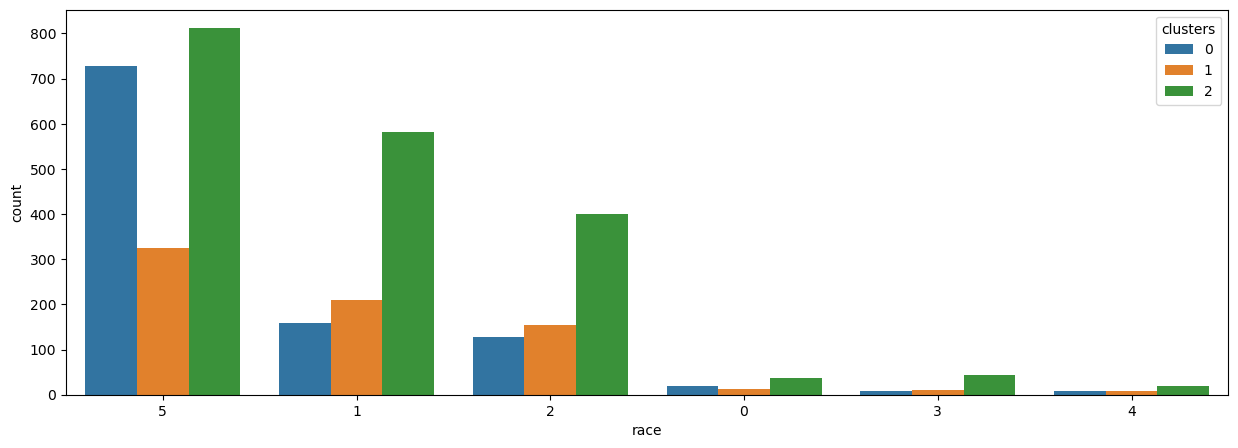

In [ ]:
# Plot race clusters
plt.subplots(figsize = (15,5))
sns.countplot(x=df_cluster['race'],order=df_cluster['race'].value_counts().index,hue=df_cluster['clusters'])
plt.show()

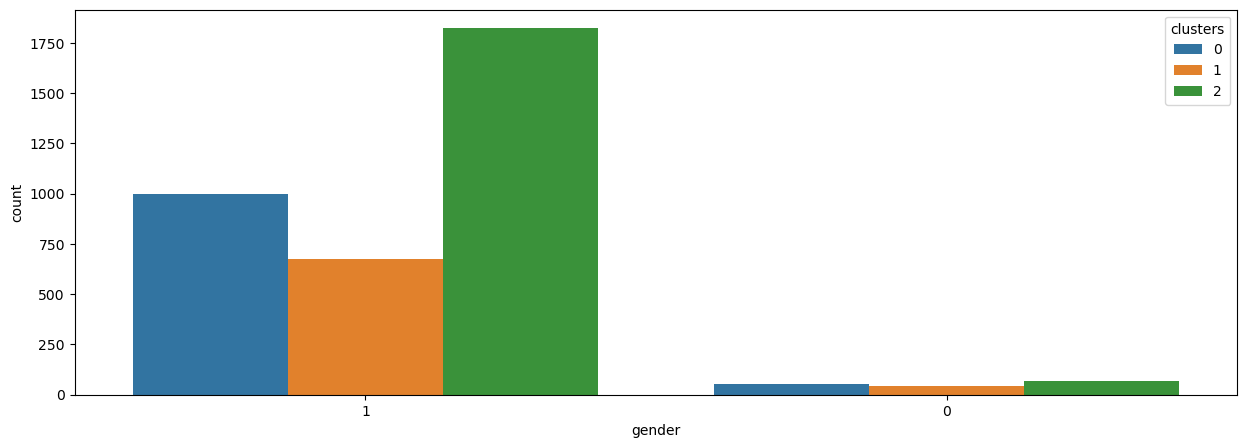

In [ ]:
# Plot gender clusters
plt.subplots(figsize = (15,5))
sns.countplot(x=df_cluster['gender'],order=df_cluster['gender'].value_counts().index,hue=df_cluster['clusters'])
plt.show()

#### K Medoids Clusters

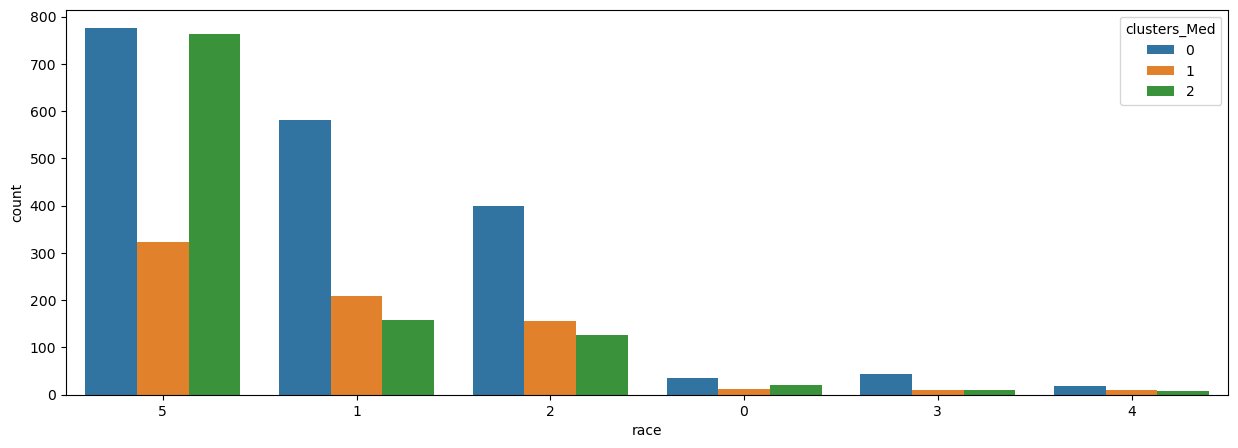

In [ ]:
# Plot race clusters
plt.subplots(figsize = (15,5))
sns.countplot(x=df_cluster_Med['race'],order=df_cluster_Med['race'].value_counts().index,hue=df_cluster_Med['clusters_Med'])
plt.show()

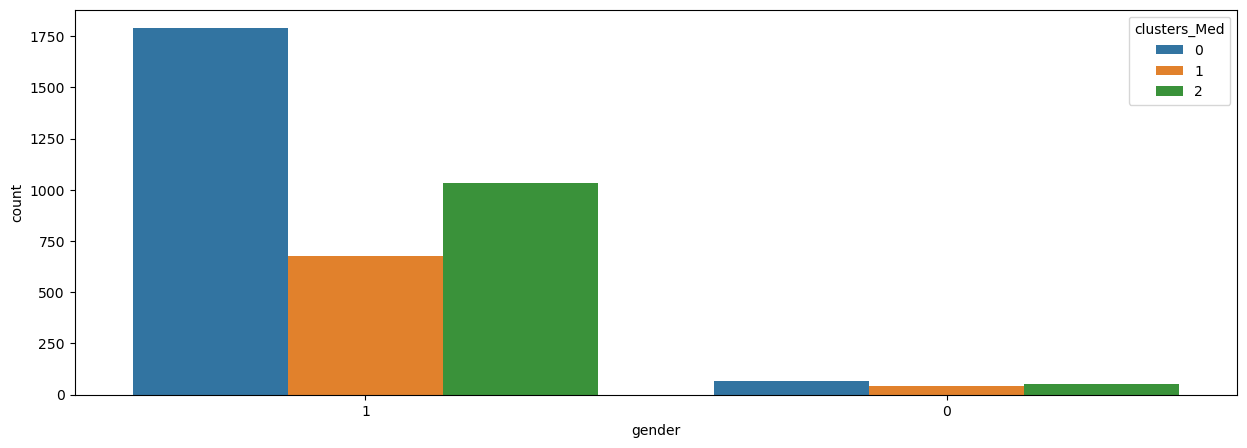

In [ ]:
# Plot gender clusters
plt.subplots(figsize = (15,5))
sns.countplot(x=df_cluster_Med['gender'],order=df_cluster_Med['gender'].value_counts().index,hue=df_cluster_Med['clusters_Med'])
plt.show()

#### Conclusion:
* From Cluster profiling and Visualization, we can observe that K-means and K-medoids(PAM) both are giving almost the same results.
* Optimal number of clusters seems to be 3.
* Since most of our variables are categorical in nature we can rely on K Medoids.
